# Ad-Hoc Reporting

Utilize your `sqlite3` and `pandas` knowledge to query your database and generate visualizations! 

After completing your report, answer the 4 analytical questions below. Remember that we expect comprehensive numerical detail! 

In [70]:
import sqlite3

import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

In [71]:
# TODO: Set up a connection the "Market.db" database
conn = sqlite3.connect("db/Market.db")

# TODO: Set up the cursor
cur = conn.cursor()



### Question 1 : Total Products Less than €10

How many products in our Products table cost less than 10 EUR?

**Hint**: You can apply an aggregate function to an entire table.

In [72]:
# TODO: Write a SQL query which will answer the question above.

cur.execute("""
    SELECT COUNT(*) AS prod_under_10_euro
    FROM Products
    WHERE Price < 10;
""")
rows = cur.fetchall()
print(rows)





[(11,)]


### Question 2 : Most Frequent Country by Supplier

What is the most common country of origin in our Suppliers table? Sort your output in descending order.

**Hint**: `GROUP BY` can be used to calculate grouped aggregates.

In [73]:
# TODO: Write a SQL query which will answer the question above.
cur.execute("""
    SELECT Country, COUNT(*) AS num_suppliers
    FROM Suppliers
    GROUP BY Country
    ORDER BY num_suppliers DESC;

""")

# TODO: Fetch your list of tuples and print it out
rows = cur.fetchall()
print(rows)

[('USA', 4), ('Germany', 3), ('France', 3), ('UK', 2), ('Sweden', 2), ('Japan', 2), ('Italy', 2), ('Canada', 2), ('Australia', 2), ('Spain', 1), ('Singapore', 1), ('Norway', 1), ('Netherlands', 1), ('Finland', 1), ('Denmark', 1), ('Brazil', 1)]


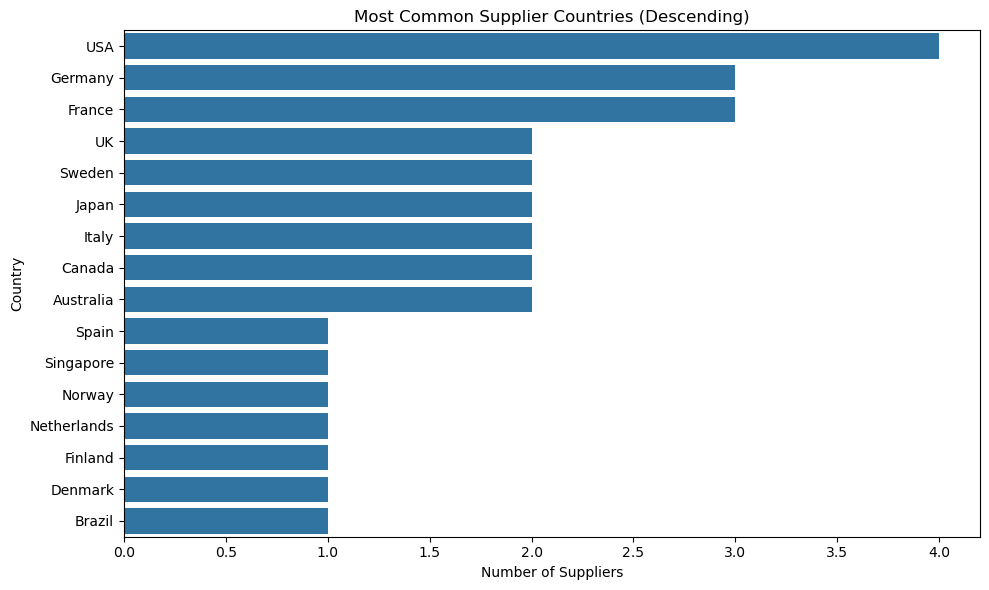

In [74]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=['Country', 'SupplierCount'])

# TODO: Generate a visualization on this dataframe
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='SupplierCount', y='Country')
plt.title("Most Common Supplier Countries (Descending)")
plt.xlabel("Number of Suppliers")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

### Question 3 : Most Frequent Country by Customer

What is the most common country of origin in our Customers table? Sort your output in descending order.

**Hint**: `GROUP BY` can be used to calculate grouped aggregates.

In [75]:
# TODO: Write a SQL query which will answer the question above.
cur.execute("""
    SELECT Country, COUNT(*) AS num_customers
    FROM Customers
    GROUP BY Country
    ORDER BY num_customers DESC;
""")

# TODO: Fetch your list of tuples and print it out
rows = cur.fetchall()
print(rows)

[('USA', 13), ('Germany', 11), ('France', 11), ('Brazil', 9), ('UK', 7), ('Spain', 5), ('Mexico', 5), ('Venezuela', 4), ('Italy', 3), ('Canada', 3), ('Argentina', 3), ('Switzerland', 2), ('Sweden', 2), ('Portugal', 2), ('Finland', 2), ('Denmark', 2), ('Belgium', 2), ('Austria', 2), ('Poland', 1), ('Norway', 1), ('Ireland', 1)]


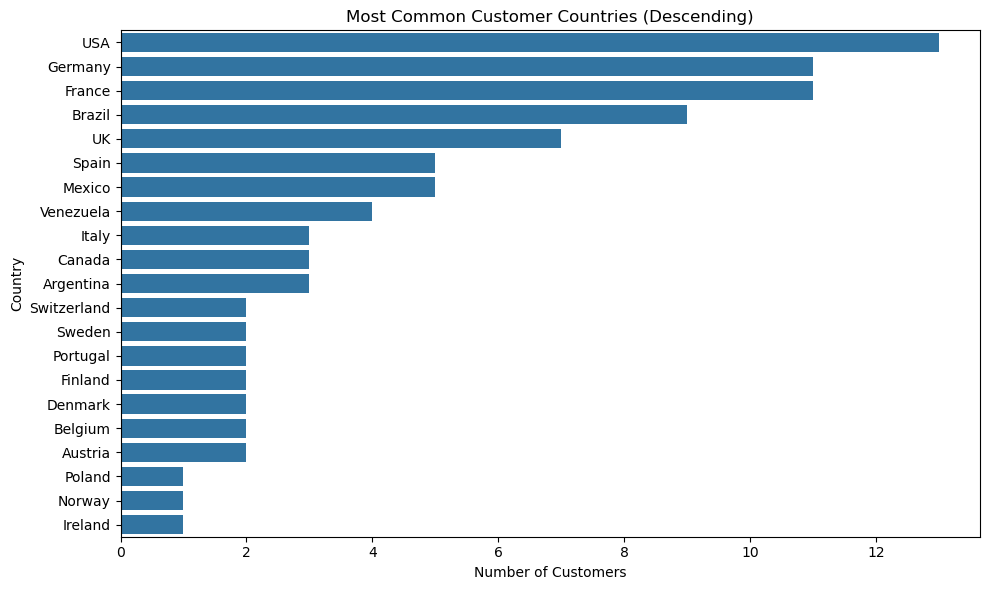

In [76]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=["Country", "Customers"])

# TODO: Generate a visualization on this dataframe
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Customers', y='Country')
plt.title("Most Common Customer Countries (Descending)")
plt.xlabel("Number of Customers")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

### Question 4 : Least Popular Products by Quantity

What are the least popular products by order quantity? Limit your output to the bottom 20 products. Sort this table in ascending order and be sure to include the product name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [77]:
# TODO: Write a SQL query which will answer the question above.
cur.execute("""
    SELECT p.ProductName, SUM(od.Quantity) AS total_ordered
    FROM OrderDetails od
    JOIN Products p ON od.ProductID = p.ProductID
    GROUP BY p.ProductName
    ORDER BY total_ordered ASC
    LIMIT 20;
""")

# TODO: Fetch your list of tuples and print it out
rows = cur.fetchall()
print(rows)

[('Laughing Lumberjack Lager', 5), ('Røgede sild', 15), ("Gustaf's Knäckebröd", 18), ('Mishi Kobe Niku', 20), ('Genen Shouyu', 25), ("Uncle Bob's Organic Dried Pears", 25), ('Queso Manchego La Pastora', 27), ("Grandma's Boysenberry Spread", 36), ('Gravad lax', 39), ('Röd Kaviar', 45), ('Filo Mix', 48), ('Mascarpone Fabioli', 52), ('Chocolade', 70), ('Valkoinen suklaa', 70), ('NuNuCa Nuß-Nougat-Creme', 71), ('Singaporean Hokkien Fried Mee', 77), ('Aniseed Syrup', 80), ('Ikura', 85), ('Louisiana Hot Spiced Okra', 90), ('Schoggi Schokolade', 90)]


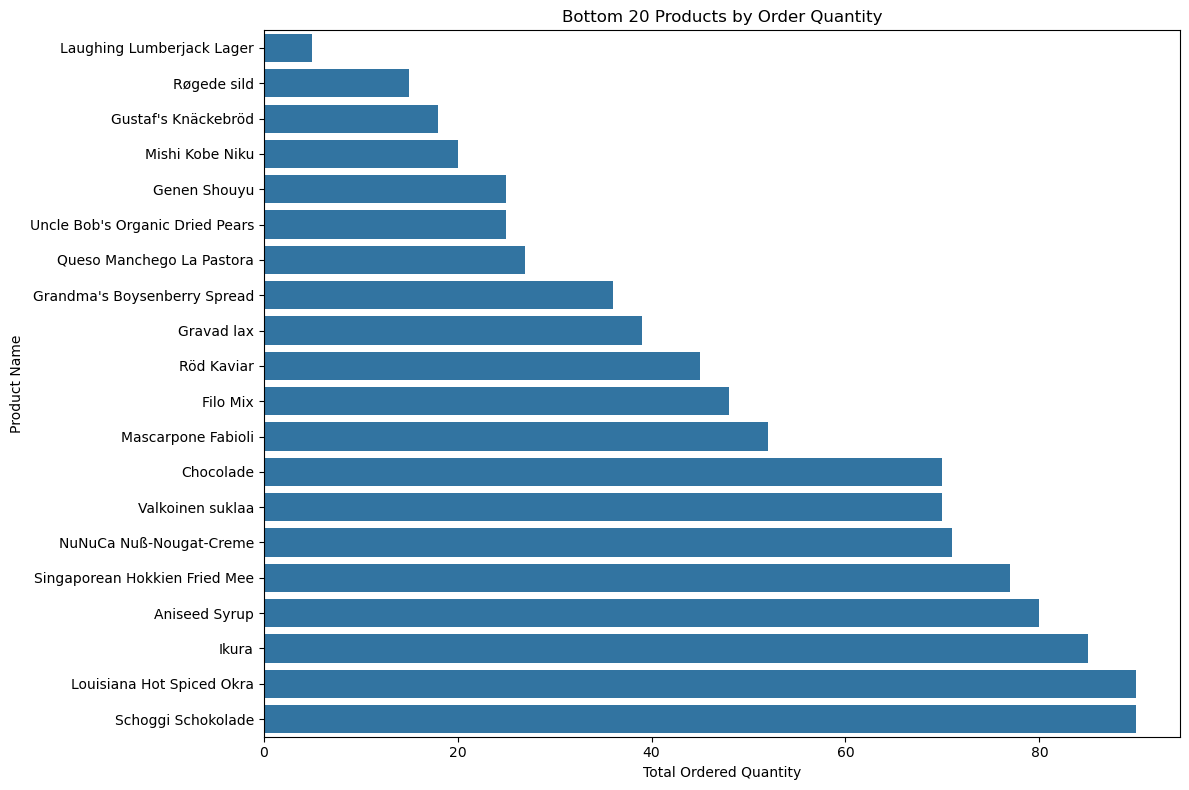

In [78]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=['ProductName', 'TotalOrdered'])

# TODO: Generate a visualization on this dataframe
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='TotalOrdered', y='ProductName')
plt.title("Bottom 20 Products by Order Quantity")
plt.xlabel("Total Ordered Quantity")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()

### Question 5 : Least Popular Products by Revenue

What are the least popular products by **total revenue** (order quantity * price)? Sort this table in ascending order and be sure to include the product name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [79]:
# TODO: Write a SQL query which will answer the question above.
query = """
SELECT 
    p.ProductName,
    SUM(od.Quantity * p.Price) AS TotalRevenue
FROM 
    OrderDetails od
JOIN 
    Products p ON od.ProductID = p.ProductID
GROUP BY 
    p.ProductName
ORDER BY 
    TotalRevenue ASC;
"""

# Convert to list of tuples
cur.execute(query)
least_popular_tuples = cur.fetchall()  

# Print the list of tuples
print(least_popular_tuples)

[('Laughing Lumberjack Lager', 70), ('Røgede sild', 142.5), ('Filo Mix', 336), ("Gustaf's Knäckebröd", 378), ('Genen Shouyu', 387.5), ('Konbu', 552), ('Röd Kaviar', 675), ('Guaraná Fantástica', 711.0), ("Uncle Bob's Organic Dried Pears", 750), ('Geitost', 790.0), ('Aniseed Syrup', 800), ('Chocolade', 892.5), ("Grandma's Boysenberry Spread", 900), ('Zaanse koeken', 959.5), ('NuNuCa Nuß-Nougat-Creme', 994), ('Gravad lax', 1014), ('Queso Manchego La Pastora', 1026), ('Singaporean Hokkien Fried Mee', 1078), ('Rhönbräu Klosterbier', 1116.0), ('Valkoinen suklaa', 1137.5), ("Jack's New England Clam Chowder", 1341.35), ('Original Frankfurter grüne Soße', 1404), ("Sir Rodney's Scones", 1470), ('Tunnbröd', 1485), ('Louisiana Hot Spiced Okra', 1530), ('Sasquatch Ale', 1540), ('Mascarpone Fabioli', 1664), ('Teatime Chocolate Biscuits', 1665.2), ('Spegesild', 1740), ('Longlife Tofu', 1860), ('Mishi Kobe Niku', 1940), ('Escargots de Bourgogne', 2053.75), ('Tourtière', 2086.0), ("Chef Anton's Cajun S

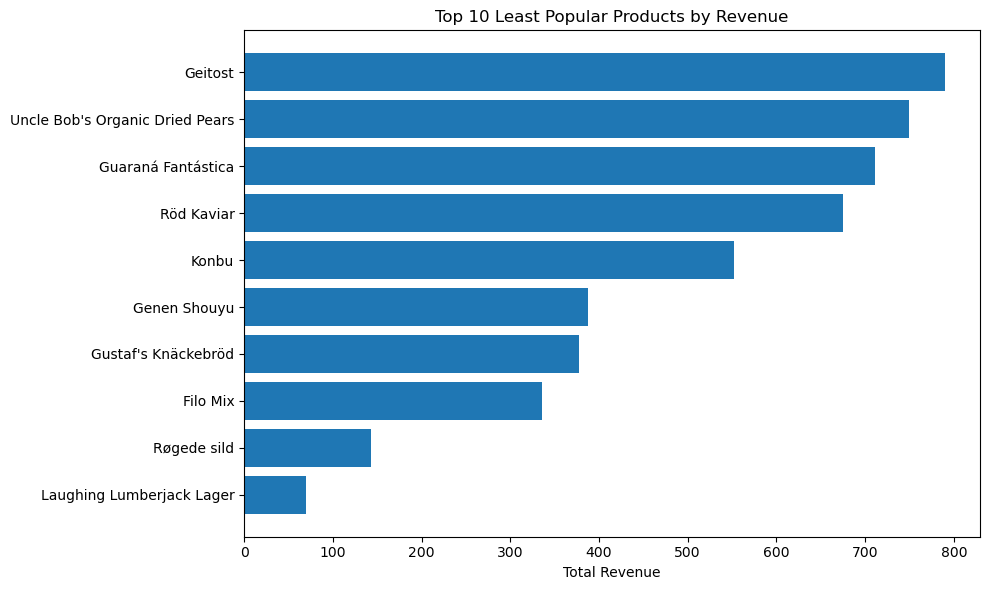

In [80]:
# TODO: Convert your list of tuples to a dataframe
df_leastpopular = pd.DataFrame(least_popular_tuples, columns=['ProductName', 'TotalRevenue'])


# Take only the top 10 least popular products
df_leastpopular_top10 = df_leastpopular.head(10)


# TODO: Generate a visualization on this dataframe
# Plot bar chart
plt.figure(figsize=(10, 6))
plt.barh(df_leastpopular_top10['ProductName'], df_leastpopular_top10['TotalRevenue'])
plt.xlabel('Total Revenue')
plt.title('Top 10 Least Popular Products by Revenue')
plt.tight_layout()
plt.show()


### Question 6 : Countries with the Most Orders

Which country's have placed the most orders? For each country, list its' name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [81]:
# TODO: Write a SQL query which will answer the question above.
query = """
SELECT 
    c.Country,
    COUNT(o.OrderID) AS OrderCount
FROM 
    Customers c
JOIN 
    Orders o ON c.CustomerID = o.CustomerID
GROUP BY 
    c.Country
ORDER BY 
    OrderCount DESC;
"""

# TODO: Fetch your list of tuples and print it out
cur.execute(query)
country_orders_tuples = cur.fetchall()

# Print list of tuples
print(country_orders_tuples)




[('USA', 29), ('Germany', 25), ('Brazil', 19), ('France', 18), ('Austria', 13), ('UK', 12), ('Venezuela', 9), ('Mexico', 9), ('Canada', 9), ('Finland', 8), ('Sweden', 7), ('Spain', 7), ('Italy', 7), ('Ireland', 6), ('Portugal', 5), ('Switzerland', 4), ('Denmark', 4), ('Belgium', 2), ('Poland', 1), ('Norway', 1), ('Argentina', 1)]


        Country  OrderCount
0           USA          29
1       Germany          25
2        Brazil          19
3        France          18
4       Austria          13
5            UK          12
6     Venezuela           9
7        Mexico           9
8        Canada           9
9       Finland           8
10       Sweden           7
11        Spain           7
12        Italy           7
13      Ireland           6
14     Portugal           5
15  Switzerland           4
16      Denmark           4
17      Belgium           2
18       Poland           1
19       Norway           1
20    Argentina           1


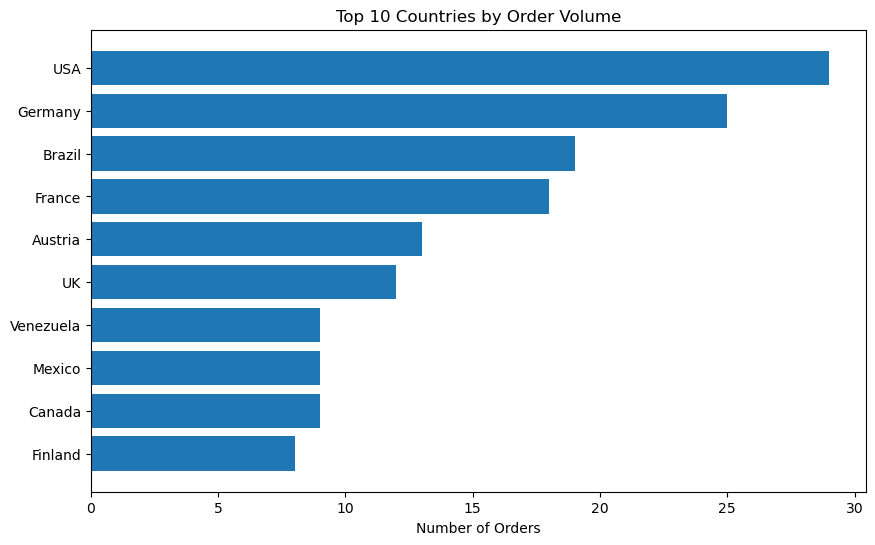

In [82]:
# TODO: Convert your list of tuples to a dataframe
df_country_orders = pd.read_sql_query(query, conn)

# Print DataFrame
print(df_country_orders)


# TODO: Generate a visualization on this dataframe
#  limit to top 10 countries
df_top10_countries = df_country_orders.head(10)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(df_top10_countries['Country'], df_top10_countries['OrderCount'])
plt.xlabel('Number of Orders')
plt.title('Top 10 Countries by Order Volume')
plt.gca().invert_yaxis()
plt.show()

### Question 7 : Countries with Customers Who Do Not Order

Which countries have at least one customer who has placed **no** orders? Count up the total number of customers who have placed no orders for each respective country. For each country, list its' name in your output and visualizations.

**Hint**: A join is necessary. We can also check if a column is `NULL` using the `IS` keyword.

In [83]:
# TODO: Write a SQL query which will answer the question above.
query = """
SELECT 
    c.Country,
    COUNT(c.CustomerID) AS NoOrderCustomerCount
FROM 
    Customers c
LEFT JOIN 
    Orders o ON c.CustomerID = o.CustomerID
WHERE 
    o.OrderID IS NULL
GROUP BY 
    c.Country
ORDER BY 
    NoOrderCustomerCount DESC;
"""

# TODO: Fetch your list of tuples and print it out
cur.execute(query)
no_order_tuples = cur.fetchall()

# Print list of tuples
print(no_order_tuples)


[('USA', 5), ('France', 4), ('Germany', 2), ('Argentina', 2), ('UK', 1), ('Spain', 1), ('Canada', 1), ('Belgium', 1)]


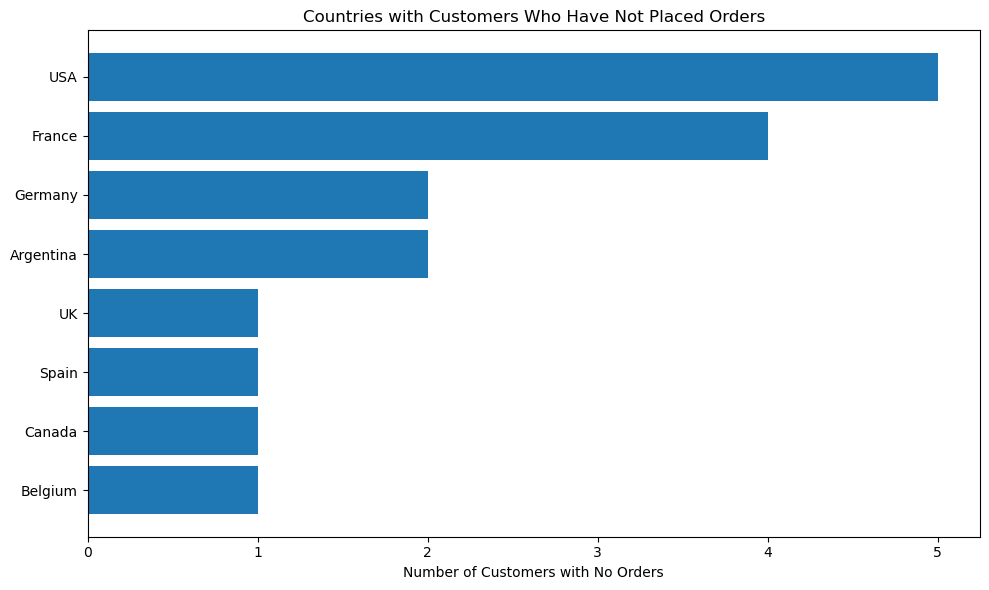

In [ ]:
# TODO: Convert your list of tuples to a dataframe
df_no_order = pd.DataFrame(no_order_tuples, columns=["Country", "NoOrderCustomerCount"])


# TODO: Generate a visualization on this dataframe

# Take only the top 10 results
top_no_order = df_no_order.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_no_order['Country'], top_no_order['NoOrderCustomerCount'])
plt.xlabel('Number of Customers with No Orders')
plt.title('Countries with Customers Who Have Not Placed Orders')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Question 8 : Most Popular Suppliers

What are the most popular suppliers according to order count? List the supplier names and their number of orders. Sort your output in descending order.

**Hint**: You might need to use a subquery to join more than 2 tables together.

In [85]:
# TODO: Write a SQL query which will answer the question above.
query = """
SELECT
    s.SupplierName,
    COUNT(DISTINCT od.OrderID) AS OrderCount
FROM
    Suppliers s
JOIN
    Products p ON s.SupplierID = p.SupplierID
JOIN
    OrderDetails od ON p.ProductID = od.ProductID
GROUP BY
    s.SupplierID, s.SupplierName
ORDER BY
    OrderCount DESC;
"""

# Execute query and fetch results as list of tuples
cur.execute(query)
top_suppliers = cur.fetchall()

# Print list of tuples
print(top_suppliers)




[('Pavlova, Ltd.', 37), ('Plutzer Lebensmittelgroßmärkte AG', 37), ('Specialty Biscuits, Ltd.', 33), ('Norske Meierier', 30), ('Formaggi Fortini s.r.l.', 27), ('Gai pâturage', 26), ('Exotic Liquid', 21), ('New Orleans Cajun Delights', 20), ('Pasta Buttini s.r.l.', 20), ('Karkki Oy', 19), ('Ma Maison', 19), ("G'day, Mate", 18), ('New England Seafood Cannery', 17), ("Mayumi's", 16), ('Bigfoot Breweries', 16), ('Leka Trading', 16), ('Aux joyeux ecclésiastiques', 15), ("Forêts d'érables", 15), ('Heli Süßwaren GmbH & Co. KG', 14), ('Svensk Sjöföda AB', 13), ('Tokyo Traders', 12), ("Cooperativa de Quesos 'Las Cabras'", 11), ('Refrescos Americanas LTDA', 11), ('Nord-Ost-Fisch Handelsgesellschaft mbH', 8), ('Lyngbysild', 8), ("Grandma Kelly's Homestead", 6), ('PB Knäckebröd AB', 6), ('Zaanse Snoepfabriek', 4), ('Escargots Nouveaux', 4)]


                             Supplier Name  Order Count
0                            Pavlova, Ltd.           37
1        Plutzer Lebensmittelgroßmärkte AG           37
2                 Specialty Biscuits, Ltd.           33
3                          Norske Meierier           30
4                  Formaggi Fortini s.r.l.           27
5                             Gai pâturage           26
6                            Exotic Liquid           21
7               New Orleans Cajun Delights           20
8                     Pasta Buttini s.r.l.           20
9                                Karkki Oy           19
10                               Ma Maison           19
11                             G'day, Mate           18
12             New England Seafood Cannery           17
13                                Mayumi's           16
14                       Bigfoot Breweries           16
15                            Leka Trading           16
16              Aux joyeux ecclésiastiques      

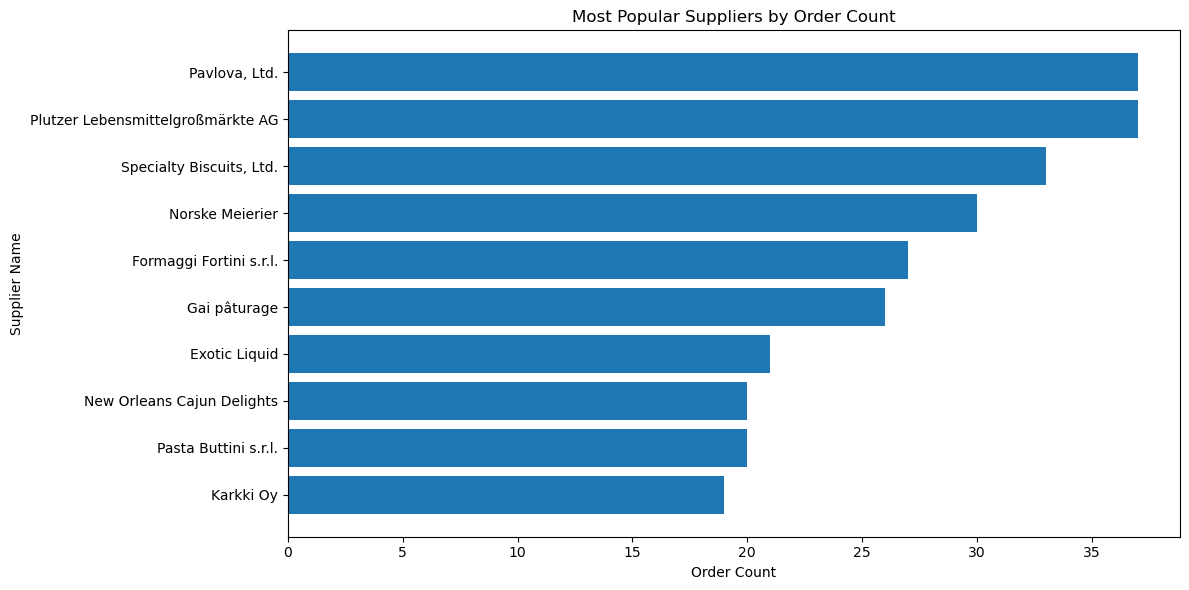

In [ ]:
# TODO: Convert your list of tuples to a dataframe

top_suppliers = pd.DataFrame(top_suppliers, columns=['Supplier Name', 'Order Count'])

#Print list of tuples
print (top_suppliers)

# Print top list 10 suppliers
top10_suppliers = (top_suppliers.head(10))
print (top10_suppliers)
                                              
# TODO: Generate a visualization on this dataframe
plt.figure(figsize=(12, 6))
plt.barh(top10_suppliers['Supplier Name'], top10_suppliers['Order Count'])
plt.xlabel('Order Count')
plt.ylabel('Supplier Name')
plt.title('Most Popular Suppliers by Order Count')
plt.gca().invert_yaxis()  # Most popular at the top
plt.tight_layout()
plt.show()

## Report

Answer the following analytical questions using numerical evidence.

### Question 1

Which countries have the greatest number of customers? How does this correlate with the number of suppliers by country (i.e. do more customers lead to less or more suppliers)? Which evidence supports your answer?

The USA has the highest number of customers (13), followed by Germany and France (10 each), and Brazil (9). However, this customer concentration doesn't necessarily correspond with supplier distribution. For example, while Germany is strong in both customers and suppliers, Brazil, despite having 9 customers, has few to no suppliers listed. This suggests there's no strong correlation between customer and supplier counts by country. The evidence shows supplier presence is influenced by other factors like logistics or trade relationships, rather than purely demand volume.

### Question 2

What is the least popular product by order quantity? How does this correlate with revenue (i.e. do less popular products by quantity lead to less or more revenue)? Which evidence supports your answer?

The least ordered product is Laughing Lumberjack Lager, with the lowest total quantity among all products. Its unit price and corresponding revenue are not high enough to compensate for the low volume resulting in minimal total revenue. For example, products with higher order quantities like Schoggi Schokolade and Louisiana Hot Spiced Okra generate total revenues exceeding 85 units sold, compared to barely 5–10 units for Laughing Lumberjack Lager. This shows a strong positive correlation between quantity sold and revenue, confirming that lower popularity by volume typically results in lower revenue generation.

### Question 3

Which country has the most orders? How does this correlate with the number of customers who do not order (i.e. do countries with more ordering customers have more or less non-ordering customers)? Which evidence supports your answer?

The USA has the most orders, with 29 total orders, followed by Germany with 25 and Brazil with 19. Interestingly, the USA also has the highest number of non-ordering customers at 5, suggesting that a high number of total customers can include both active and inactive ones. France similarly ranks high in both categories, with 18 orders and 4 non-ordering customers. This indicates that countries with more ordering customers may also have more non-ordering customers, likely due to a larger overall customer base rather than lower engagement. The data supports this correlation, showing that high order volumes do not necessarily imply fewer inactive users.

### Question 4

Which supplier has the most orders? Which evidence supports your answer?

The supplier with the most orders is Pavlova Ltd., tied with Plutzer Lebensmittel... AG, each having 37 orders. This is supported by the bar chart titled "Most Popular Suppliers by Order Count", where both suppliers have bars extending to the highest value on the x-axis, clearly leading all other suppliers in terms of order volume.